In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks')

In [2]:
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode()

In [3]:
df=pd.read_excel('KPMGModule1.xlsx')
df.head()

transaction_id  product_id  customer_id  online_order order_status  \
0               1           2         2950             0     Approved   
1           11065           1         2950             0     Approved   
2           18923          62         2950             0     Approved   
3               2           3         3120             1     Approved   
4            6862           4         3120             0     Approved   

            brand product_line product_class product_size  list_price  ...  \
0           Solex     Standard        medium       medium       71.49  ...   
1  Giant Bicycles     Standard        medium       medium     1403.50  ...   
2           Solex     Standard        medium       medium      478.16  ...   
3   Trek Bicycles     Standard        medium        large     2091.47  ...   
4  Giant Bicycles     Standard          high       medium     1129.13  ...   

   deceased_indicator owns_car tenure            address  postcode state  \
0                   N      Yes   10.0  984 Hoepker Court      3064   VIC   
1                   N      Yes   10.0  984 Hoepker Court      3064   VIC   
2                   N      Yes   10.0  984 Hoepker Court      3064   VIC   
3                   N      Yes   10.0    4 Shopko Circle      2196   NSW   
4                   N      Yes   10.0    4 Shopko Circle      2196   NSW   

     country property_valuation Transaction_date transaction_Month  
0  Australia                  6               25                 2  
1  Australia                  6               16                10  
2  Australia                  6               26                 4  
3  Australia                  5               21                 5  
4  Australia                  5                5                10  

[5 rows x 29 columns]

In [4]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Transaction_date', 'transaction_Month'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19959 entries, 0 to 19958
Data columns (total 29 columns):
transaction_id                         19959 non-null int64
product_id                             19959 non-null int64
customer_id                            19959 non-null int64
online_order                           19959 non-null int64
order_status                           19959 non-null object
brand                                  19959 non-null object
product_line                           19959 non-null object
product_class                          19959 non-null object
product_size                           19959 non-null object
list_price                             19959 non-null float64
standard_cost                          19959 non-null float64
product_first_sold_date                19959 non-null datetime64[ns]
first_name                             19959 non-null object
gender                                 19959 non-null object
past_3_years_bike_related_purch

In [6]:
df.groupby(['state','owns_car'])['list_price'].mean()

state            owns_car
NSW              No          1092.877880
                 Yes         1114.527527
New South Wales  No          1057.549622
                 Yes         1033.055466
QLD              No          1090.561792
                 Yes         1146.047623
VIC              No          1101.119751
                 Yes         1127.380507
Victoria         No          1067.732711
                 Yes         1119.615529
Name: list_price, dtype: float64

In [7]:
import datetime as datetime
now = pd.datetime.now()
df.loc[:,"DOB"] = pd.to_datetime(df.loc[:,"DOB"].astype(str), format="%Y-%m-%d")
df.loc[:,"age"] = now.year-df["DOB"].dt.year

In [8]:
df1=df.groupby(['age'])['standard_cost'].mean().reset_index()
trace1=go.Scatter(x=df1.age,y=df.standard_cost,name='  List price',connectgaps=True)
data=[trace1]
fig=dict(data=data)
plotly.offline.iplot(fig,filename='line')

In [9]:
df.head()

transaction_id  product_id  customer_id  online_order order_status  \
0               1           2         2950             0     Approved   
1           11065           1         2950             0     Approved   
2           18923          62         2950             0     Approved   
3               2           3         3120             1     Approved   
4            6862           4         3120             0     Approved   

            brand product_line product_class product_size  list_price  ...  \
0           Solex     Standard        medium       medium       71.49  ...   
1  Giant Bicycles     Standard        medium       medium     1403.50  ...   
2           Solex     Standard        medium       medium      478.16  ...   
3   Trek Bicycles     Standard        medium        large     2091.47  ...   
4  Giant Bicycles     Standard          high       medium     1129.13  ...   

   owns_car tenure            address postcode  state    country  \
0       Yes   10.0  984 Hoepker Court     3064    VIC  Australia   
1       Yes   10.0  984 Hoepker Court     3064    VIC  Australia   
2       Yes   10.0  984 Hoepker Court     3064    VIC  Australia   
3       Yes   10.0    4 Shopko Circle     2196    NSW  Australia   
4       Yes   10.0    4 Shopko Circle     2196    NSW  Australia   

  property_valuation Transaction_date transaction_Month age  
0                  6               25                 2  65  
1                  6               16                10  65  
2                  6               26                 4  65  
3                  5               21                 5  41  
4                  5                5                10  41  

[5 rows x 30 columns]

In [10]:
def grouping(data):
    bins=[0,35,55,89]
    grp=pd.cut(data['age'],bins=bins,labels=False)
    data['ranks']=grp
    return data
df_n=grouping(df)
df_n.head()

transaction_id  product_id  customer_id  online_order order_status  \
0               1           2         2950             0     Approved   
1           11065           1         2950             0     Approved   
2           18923          62         2950             0     Approved   
3               2           3         3120             1     Approved   
4            6862           4         3120             0     Approved   

            brand product_line product_class product_size  list_price  ...  \
0           Solex     Standard        medium       medium       71.49  ...   
1  Giant Bicycles     Standard        medium       medium     1403.50  ...   
2           Solex     Standard        medium       medium      478.16  ...   
3   Trek Bicycles     Standard        medium        large     2091.47  ...   
4  Giant Bicycles     Standard          high       medium     1129.13  ...   

   tenure            address postcode state    country property_valuation  \
0    10.0  984 Hoepker Court     3064   VIC  Australia                  6   
1    10.0  984 Hoepker Court     3064   VIC  Australia                  6   
2    10.0  984 Hoepker Court     3064   VIC  Australia                  6   
3    10.0    4 Shopko Circle     2196   NSW  Australia                  5   
4    10.0    4 Shopko Circle     2196   NSW  Australia                  5   

  Transaction_date transaction_Month age ranks  
0               25                 2  65     2  
1               16                10  65     2  
2               26                 4  65     2  
3               21                 5  41     1  
4                5                10  41     1  

[5 rows x 31 columns]

In [11]:
df_n.ranks.value_counts()

1    10056
0     6064
2     3839
Name: ranks, dtype: int64

In [12]:
df.gender.replace({"F":"Female","Femal":'Female',"M":"Male"},inplace=True)
df.gender.head()

0      Male
1      Male
2      Male
3    Female
4    Female
Name: gender, dtype: object

In [13]:
gr=df.groupby(['gender','ranks']).count()
gr=gr.first_name
gr

gender  ranks
Female  0        2961
        1        5136
        2        1900
Male    0        2977
        1        4677
        2        1862
U       0         126
        1         243
        2          77
Name: first_name, dtype: int64

In [14]:
df.loc[df.ranks==2].age.max()

89

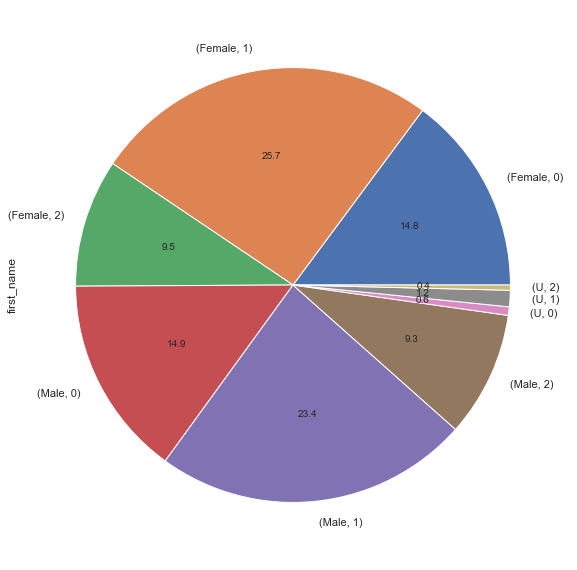

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
gr.plot(kind='pie',autopct='%.1f')

In [16]:
F_35=gr[0]
F_55=gr[1]
F_89=gr[2]
M_35=gr[3]
M_55=gr[4]
M_89=gr[5]

([<matplotlib.axis.XTick at 0x155c4ae2a58>,
 <a list of 6 Text xticklabel objects>)

<Figure size 1440x1440 with 0 Axes>

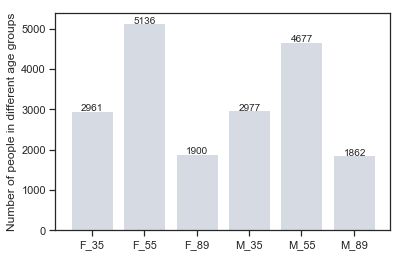

In [17]:
plt.figure(figsize=(20,20))
graphgen = [F_35,F_55,F_89,M_35,M_55,M_89]
colorr = (0.19,0.28,0.46,0.2)
x2 = np.arange(6)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of people in different age groups')
plt.bar(x2, graphgen, color = colorr)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ("F_35","F_55","F_89","M_35","M_55","M_89"))

In [18]:
df.past_3_years_bike_related_purchases.describe()

count    19959.000000
mean        48.752793
std         28.616982
min          0.000000
25%         24.000000
50%         48.000000
75%         73.000000
max         99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

In [19]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Transaction_date', 'transaction_Month', 'age',
       'ranks'],
      dtype='object')

In [20]:
df.loc[(df.past_3_years_bike_related_purchases>=48)& (df.order_status=='Approved')]

transaction_id  product_id  customer_id  online_order order_status  \
3                   2           3         3120             1     Approved   
4                6862           4         3120             0     Approved   
5                9155          91         3120             1     Approved   
6               11409          95         3120             0     Approved   
7               13066          38         3120             1     Approved   
8               15829          41         3120             0     Approved   
9               18612          10         3120             0     Approved   
16                  4          88         3135             0     Approved   
17               1134          59         3135             1     Approved   
18               7000          98         3135             0     Approved   
19               8683          59         3135             0     Approved   
20               9385          73         3135             0     Approved   
21              14352           2         3135             0     Approved   
22              16342          71         3135             1     Approved   
42                  7          22         1542             1     Approved   
43               4160          69         1542             1     Approved   
44              13247          16         1542             1     Approved   
45              13388          28         1542             0     Approved   
46              17672          55         1542             0     Approved   
47                  8          15         2459             0     Approved   
48               1406          50         2459             1     Approved   
49               3356           0         2459             0     Approved   
50               5205          95         2459             0     Approved   
51               9783          30         2459             0     Approved   
52               9952          99         2459             0     Approved   
53              10292          14         2459             1     Approved   
54              14324           0         2459             1     Approved   
55              17439           0         2459             0     Approved   
56              18393           5         2459             1     Approved   
57              18873          96         2459             1     Approved   
...               ...         ...          ...           ...          ...   
19885           17337          89         1507             0     Approved   
19886           17726          12         1507             0     Approved   
19889           15063          21          373             1     Approved   
19892           15245          83         2450             1     Approved   
19893           19896          24         2450             1     Approved   
19897           15311          48          600             1     Approved   
19898           16997          35          600             1     Approved   
19899           17259          80          600             1     Approved   
19904           15436          95         3272             1     Approved   
19912           15575          58         2895             0     Approved   
19913           17980          62         2895             0     Approved   
19914           15804          64         3281             0     Approved   
19915           16392           5         3281             0     Approved   
19918           16035          74         1523             0     Approved   
19919           17261          74         1523             1     Approved   
19920           19123          52         1523             1     Approved   
19921           16071          79          222             1     Approved   
19922           18102          21          222             1     Approved   
19936           16700          11          998             1     Approved   
19937           17275          84          998             0     Approved   
199

In [21]:
df.order_status.value_counts()

Approved     19781
Cancelled      178
Name: order_status, dtype: int64

# number of bike purchase in 3years

In [22]:
grp=df.groupby(['gender']).past_3_years_bike_related_purchases.median()
grp

gender
Female    47
Male      49
U         39
Name: past_3_years_bike_related_purchases, dtype: int64

In [23]:
grp1=df.groupby(['gender']).past_3_years_bike_related_purchases.sum()
grp1

gender
Female    482083
Male      472297
U          18677
Name: past_3_years_bike_related_purchases, dtype: int64

In [24]:
s=df.past_3_years_bike_related_purchases.sum()

In [25]:
per=((grp1/s)*100).round(2)
per

gender
Female    49.54
Male      48.54
U          1.92
Name: past_3_years_bike_related_purchases, dtype: float64

In [26]:
p1=per[0]
p2=per[1]
p3=per[2]

([<matplotlib.axis.XTick at 0x155c4ae04a8>,
 <a list of 3 Text xticklabel objects>)

<Figure size 1440x1440 with 0 Axes>

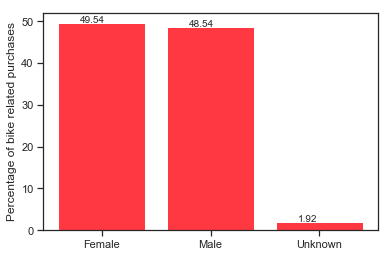

In [27]:
plt.figure(figsize=(20,20))
graphgen = [p1,p2,p3]
colorr = (1,0.001,0.05,0.78)
x2 = np.arange(3)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Percentage of bike related purchases')
plt.bar(x2, graphgen, color = colorr)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ("Female","Male","Unknown"))

In [28]:
grp2=df.groupby(['gender','ranks']).past_3_years_bike_related_purchases.sum()
grp2

gender  ranks
Female  0        147777
        1        249402
        2         84904
Male    0        148964
        1        234052
        2         89281
U       0          5398
        1          9900
        2          3379
Name: past_3_years_bike_related_purchases, dtype: int64

In [29]:
per1=((grp2/s)*100).round(2)
per1

gender  ranks
Female  0        15.19
        1        25.63
        2         8.73
Male    0        15.31
        1        24.05
        2         9.18
U       0         0.55
        1         1.02
        2         0.35
Name: past_3_years_bike_related_purchases, dtype: float64

In [30]:
p1=per1[0]
p2=per1[1]
p3=per1[2]
p4=per1[3]
p5=per1[4]
p6=per1[5]
p7=per1[6]
p8=per1[7]
p9=per1[8]

([<matplotlib.axis.XTick at 0x155c475b748>,
 <a list of 9 Text xticklabel objects>)

<Figure size 1440x1440 with 0 Axes>

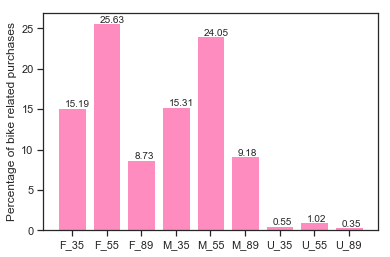

In [31]:
plt.figure(figsize=(20,20))
graphgen = [p1,p2,p3,p4,p5,p6,p7,p8,p9]
colorr = (1,0.1,0.5,0.5)
x2 = np.arange(9)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Percentage of bike related purchases')
plt.bar(x2, graphgen, color = colorr)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ("F_35","F_55","F_89","M_35","M_55","M_89","U_35","U_55","U_89"))

# Job title and industry category

In [32]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Transaction_date', 'transaction_Month', 'age',
       'ranks'],
      dtype='object')

In [33]:
grp3=df.groupby('job_industry_category').count()
grp4=df.groupby('job_industry_category').list_price.sum()

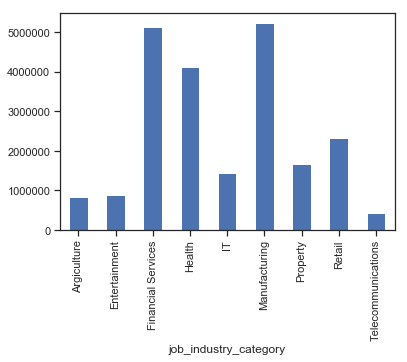

In [34]:
grp4.plot(kind='bar')

In [35]:
print(grp3.customer_id)
print(grp4)

job_industry_category
Argiculture            777
Entertainment          805
Financial Services    4628
Health                3749
IT                    1283
Manufacturing         4727
Property              1515
Retail                2080
Telecommunications     395
Name: customer_id, dtype: int64
job_industry_category
Argiculture            833327.29
Entertainment          894442.58
Financial Services    5142325.47
Health                4117166.12
IT                    1438868.11
Manufacturing         5235079.50
Property              1679975.36
Retail                2337974.54
Telecommunications     427859.15
Name: list_price, dtype: float64


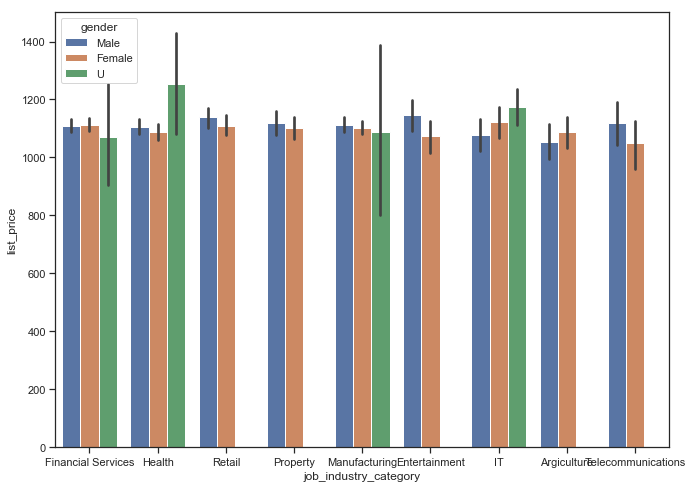

In [36]:
plt.figure(figsize=(11,8))
sns.barplot(x=df.job_industry_category,y=df.list_price,hue=df.gender)

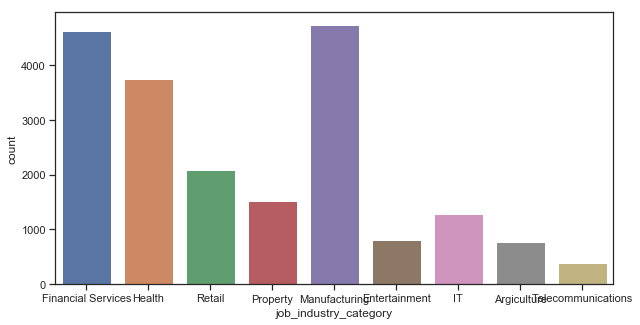

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df.job_industry_category)

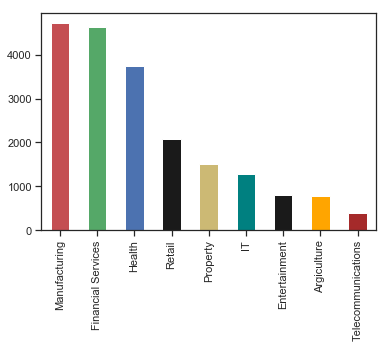

In [38]:
my_colors=['r','g','b','k','y','teal','k','orange','brown']
df.job_industry_category.value_counts().plot(kind='bar',color=my_colors)

# Postal code

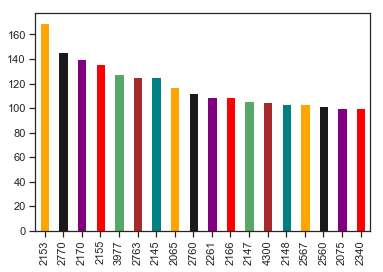

In [263]:
df.postcode.value_counts().head(18).plot(kind='bar',color=['orange','k','purple','red','g','brown','teal'])

# Customer owns car or not

we will first divide the customers into customers whose purchase in 3 years is more than 48 which is the median value of the past 3 years bike related purchase

In [39]:
pu=df.past_3_years_bike_related_purchases.median()

In [40]:
df['marginal_producs']=df['list_price']=df['standard_cost']

In [41]:
me=df.marginal_producs.median()

In [42]:
newdf=df.copy()
def addlabel(D):
    if (D['past_3_years_bike_related_purchases'] >pu):
          x=1
    else: 
          x=0
    return x

# you create a new column using other columns' information and condtions 
df['label']=df.apply(addlabel, axis=1)
#df[['education','income','newincome']].head()
df.head(5)

transaction_id  product_id  customer_id  online_order order_status  \
0               1           2         2950             0     Approved   
1           11065           1         2950             0     Approved   
2           18923          62         2950             0     Approved   
3               2           3         3120             1     Approved   
4            6862           4         3120             0     Approved   

            brand product_line product_class product_size  list_price  ...  \
0           Solex     Standard        medium       medium       53.62  ...   
1  Giant Bicycles     Standard        medium       medium      954.82  ...   
2           Solex     Standard        medium       medium      298.72  ...   
3   Trek Bicycles     Standard        medium        large      388.92  ...   
4  Giant Bicycles     Standard          high       medium      677.48  ...   

   postcode state    country property_valuation  Transaction_date  \
0      3064   VIC  Australia                  6                25   
1      3064   VIC  Australia                  6                16   
2      3064   VIC  Australia                  6                26   
3      2196   NSW  Australia                  5                21   
4      2196   NSW  Australia                  5                 5   

  transaction_Month age ranks marginal_producs label  
0                 2  65     2            53.62     0  
1                10  65     2           954.82     0  
2                 4  65     2           298.72     0  
3                 5  41     1           388.92     1  
4                10  41     1           677.48     1  

[5 rows x 33 columns]

In [43]:
h=df.label.value_counts().sum()

In [44]:
(df.label.value_counts()/h)*100

0    50.849241
1    49.150759
Name: label, dtype: float64

In [45]:
df.owns_car.value_counts()

Yes    10042
No      9917
Name: owns_car, dtype: int64

In [46]:
l=(df.label==1)

In [47]:
(df[l].owns_car.value_counts())/(df[l].owns_car.value_counts().sum())

Yes    0.507034
No     0.492966
Name: owns_car, dtype: float64

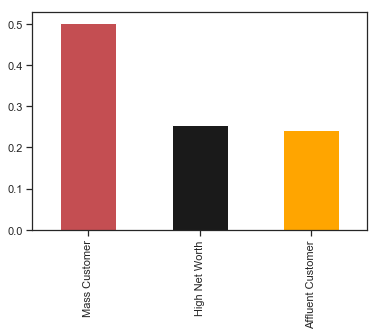

In [48]:
((df.wealth_segment.value_counts())/(df.wealth_segment.value_counts().sum())).plot(kind='bar',color=['r','k','orange'])

In [49]:
(df.wealth_segment.value_counts())/(df.wealth_segment.value_counts().sum())

Mass Customer        0.502480
High Net Worth       0.254572
Affluent Customer    0.242948
Name: wealth_segment, dtype: float64

In [50]:
df.wealth_segment.value_counts()

Mass Customer        10029
High Net Worth        5081
Affluent Customer     4849
Name: wealth_segment, dtype: int64

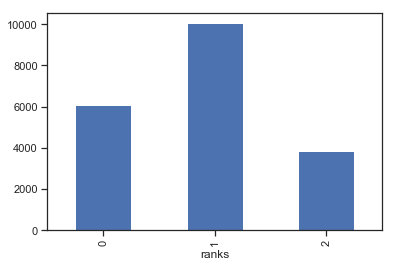

In [51]:
group=df.groupby('ranks')['wealth_segment'].count().plot(kind='bar',stacked=True)
group

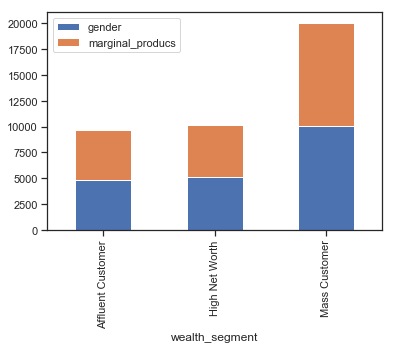

In [61]:
df.groupby(['wealth_segment'])['gender','marginal_producs'].count().plot(kind='bar',stacked=True)

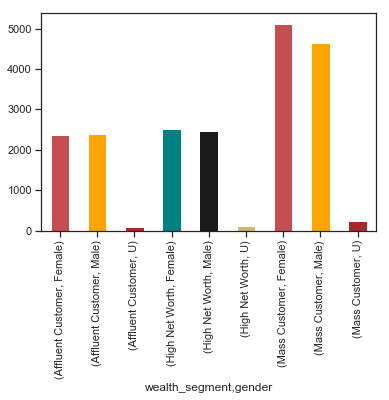

In [72]:
df.groupby(['wealth_segment','gender'])['marginal_producs'].count().plot(kind='bar',color=['r','orange','brown','teal','k','y'],stacked=True)

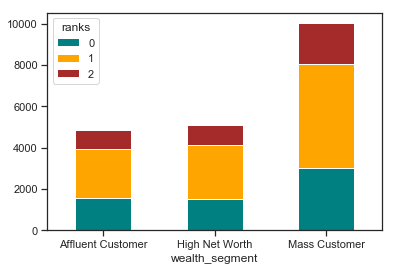

In [86]:
pd.crosstab(df['wealth_segment'], df['ranks']).plot(kind='bar', stacked=True,rot=0,color=['teal','orange','brown','k'])

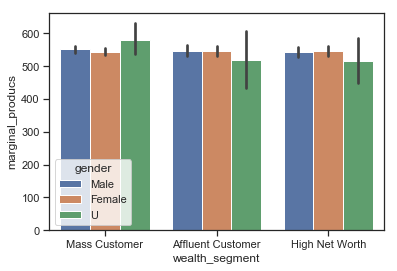

In [89]:
sns.barplot(x=df.wealth_segment,y=df.marginal_producs,hue=df.gender)

In [90]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Transaction_date', 'transaction_Month', 'age',
       'ranks', 'marginal_producs', 'label'],
      dtype='object')

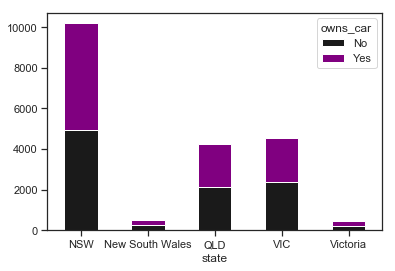

In [110]:
pd.crosstab(df['state'],df['owns_car']).plot(kind='bar', stacked=True,rot=0,color=['k','purple'],alpha=1)

In [127]:
num=df[['list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'gender',
       'past_3_years_bike_related_purchases','job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure','postcode', 'state',
       'property_valuation', 'age','marginal_producs']]

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

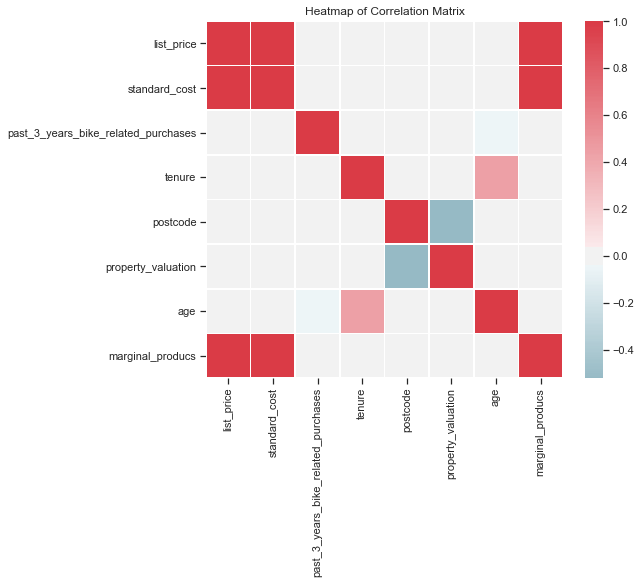

In [129]:
corr_matrix = num.corr()

# Heatmap
plt.figure(figsize = (8,8))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

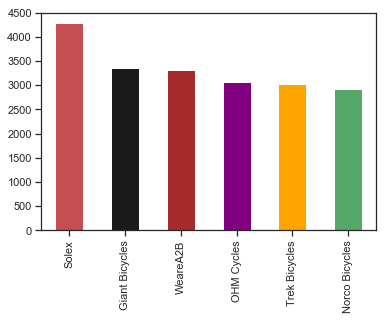

In [150]:
df.brand.value_counts().plot(kind='bar',color=['r','k','brown','purple','orange','g'],alpha=1)

# Model development

We have created two aditional columns marginal product value and age from DOB which we have divided into ranks.Now we will select particular columns and check if data needs transformation

In [130]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Transaction_date', 'transaction_Month', 'age',
       'ranks', 'marginal_producs', 'label'],
      dtype='object')

In [183]:
X=df[['gender','job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure','state','property_valuation','age','ranks']]
Y=df.label

# using statistical tests to check hypothesis

Checking if the age distribution of customers has significant difference

>Ho:mean of different customer's age groups past 3 years bike related purchase is same

>Ha: mean of different customer's age groups past 3 years bike related purchase  is significantly different

In [159]:
df.ranks.value_counts()

1    10056
0     6064
2     3839
Name: ranks, dtype: int64

In [160]:
h=df.groupby(['ranks'])
g1=h.get_group(0).past_3_years_bike_related_purchases
g2=h.get_group(1).past_3_years_bike_related_purchases
g3=h.get_group(2).past_3_years_bike_related_purchases

In [162]:
from scipy import stats as stats
stats.f_oneway(g1,g2,g3)

F_onewayResult(statistic=19.52560613065623, pvalue=3.3761611653504663e-09)

From the above anova test result we can see that the pvalue is less than 0.05.

Hence we can say that for 95% confidence interval We can reject the null hypothesis and infer there is a significant difference between the three groups.

# building machine learning models

In [182]:
#label encoding job title since it is large in number

In [185]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in ["job_title"]:
    X[col+"_code"] = le.fit_transform(X[col])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



dummy encoding the categorical variables

In [167]:
obj=['object']
df_obj=X.select_dtypes(include=obj)

In [172]:
df_obj.columns

Index(['gender', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'state'],
      dtype='object')

In [169]:
df_obj.head()

gender            job_title job_industry_category wealth_segment  \
0    Male  Software Engineer I    Financial Services  Mass Customer   
1    Male  Software Engineer I    Financial Services  Mass Customer   
2    Male  Software Engineer I    Financial Services  Mass Customer   
3  Female  Clinical Specialist                Health  Mass Customer   
4  Female  Clinical Specialist                Health  Mass Customer   

  deceased_indicator owns_car state  
0                  N      Yes   VIC  
1                  N      Yes   VIC  
2                  N      Yes   VIC  
3                  N      Yes   NSW  
4                  N      Yes   NSW

In [186]:
X=pd.get_dummies(X,prefix=None,dummy_na=False,columns=['gender','job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'state'])

In [187]:
X.head(2)

job_title  tenure  property_valuation  age  ranks  \
0  Software Engineer I    10.0                   6   65      2   
1  Software Engineer I    10.0                   6   65      2   

   job_title_code  gender_Female  gender_Male  gender_U  \
0             155              0            1         0   
1             155              0            1         0   

   job_industry_category_Argiculture  ...  wealth_segment_Mass Customer  \
0                                  0  ...                             1   
1                                  0  ...                             1   

   deceased_indicator_N  deceased_indicator_Y  owns_car_No  owns_car_Yes  \
0                     1                     0            0             1   
1                     1                     0            0             1   

   state_NSW  state_New South Wales  state_QLD  state_VIC  state_Victoria  
0          0                      0          0          1               0  
1          0                      0          0          1               0  

[2 rows x 30 columns]

In [188]:
X.columns

Index(['job_title', 'tenure', 'property_valuation', 'age', 'ranks',
       'job_title_code', 'gender_Female', 'gender_Male', 'gender_U',
       'job_industry_category_Argiculture',
       'job_industry_category_Entertainment',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Manufacturing', 'job_industry_category_Property',
       'job_industry_category_Retail',
       'job_industry_category_Telecommunications',
       'wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth',
       'wealth_segment_Mass Customer', 'deceased_indicator_N',
       'deceased_indicator_Y', 'owns_car_No', 'owns_car_Yes', 'state_NSW',
       'state_New South Wales', 'state_QLD', 'state_VIC', 'state_Victoria'],
      dtype='object')

# Lets check skew in numeric columns

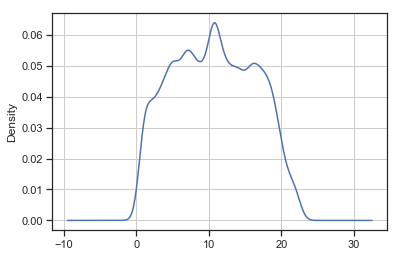

In [201]:
df.tenure.plot(kind='kde',grid=True)

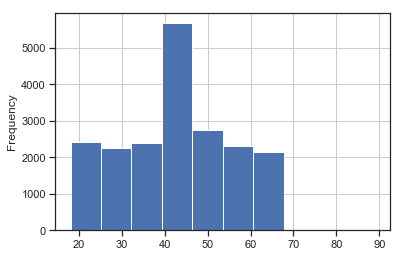

In [203]:
df.age.plot(kind='hist',grid=True)

In [207]:
print("tenure skew :",df.tenure.skew())
print("age skew :",df.age.skew())
print("property valuation skew :",df.property_valuation.skew())

tenure skew : 0.04545313426493583
age skew : 0.024130758990085998
property valuation skew : -0.6430933789908161


In [217]:
X=X.drop(['job_title'],axis=1)

As all the numerical columns are normally distributed so we do not need to transform the data.
Lets standardize the data so that all the data comes to same scale.

In [218]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [219]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(13971, 29)
(13971,)
(5988, 29)
(5988,)


In [220]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(xtrain,ytrain)
print(f'R^2 score: {rfr.score(xtrain,ytrain)}')

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



R^2 score: 0.9995705389735882


In [221]:
from sklearn.metrics import accuracy_score, mean_squared_error, average_precision_score,f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_auc_score, roc_curve

Model = []
ROC_AUC_Accuracy = []
Precision=[]
Recall=[]
F1_score=[]

In [223]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(xtrain,ytrain)
y_pred_Lr = Lr.predict(xtest)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [224]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
print(classification_report(ytest,y_pred_Lr))

              precision    recall  f1-score   support

           0       0.52      0.62      0.57      2990
           1       0.53      0.43      0.48      2998

    accuracy                           0.53      5988
   macro avg       0.53      0.53      0.52      5988
weighted avg       0.53      0.53      0.52      5988



In [225]:
from sklearn.metrics import f1_score,roc_auc_score
print(f1_score(ytest,y_pred_Lr))

0.47624309392265196


In [226]:
roc_auc_score(ytest,Lr.predict_proba(xtest)[:,1])

0.5468668075260876

In [227]:
Model.append('Logistic Regression')
ROC_AUC_Accuracy.append(roc_auc_score(ytest,Lr.predict_proba(xtest)[:,1]))
Precision.append(round(precision_score(ytest,y_pred_Lr), 4))
Recall.append(round(recall_score(ytest, y_pred_Lr,average='macro'), 40))
F1_score.append(round(f1_score(ytest,y_pred_Lr, average='macro'), 4))

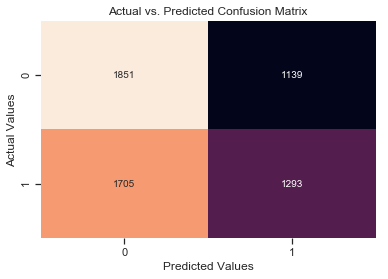

In [228]:
from sklearn.metrics import confusion_matrix,auc
cmlv=confusion_matrix(ytest,y_pred_Lr)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cmlv, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

# Roc curve for logistic regression

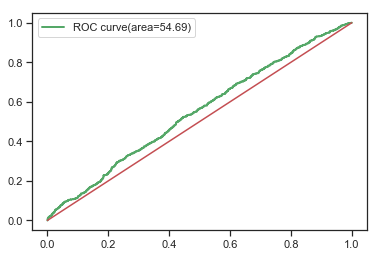

In [255]:
fpr_lv,tpr_lv,therlv=roc_curve(ytest,Lr.predict_proba(xtest)[:,1])
plt.plot(fpr_lv,tpr_lv,color='g',lw=2,label='ROC curve(area=%0.2f)'% round(auc(fpr_lv,tpr_lv)*100,2))
plt.plot(fpr_lv,fpr_lv,color='r')
plt.legend()

# Decision Tree

In [229]:
from sklearn.tree import DecisionTreeClassifier
ginidt=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5,random_state=100)
ginidt.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [230]:
ginipred=ginidt.predict(xtest)

In [231]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ginipred)

0.5273881095524382

In [232]:
roc_auc_score(ytest,ginidt.predict_proba(xtest)[:,1])

0.5432910122913605

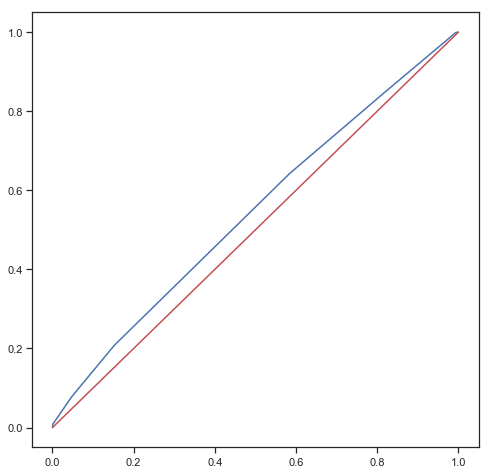

In [256]:
from sklearn.metrics import roc_curve
dtf, dtt, threhdt = roc_curve(ytest,ginidt.predict_proba(xtest)[:,1])
plt.figure(figsize=(8,8))
plt.plot(dtf, dtt, label='decision tree')
plt.plot(dtf,dtf,color='r')

In [233]:
Model.append('Decision Tree with gini criterion')
ROC_AUC_Accuracy.append(roc_auc_score(ytest,ginidt.predict_proba(xtest)[:,1]))
Precision.append(round(precision_score(ytest,ginipred), 4))
Recall.append(round(recall_score(ytest,ginipred,average='macro'), 40))
F1_score.append(round(f1_score(ytest,ginipred, average='macro'), 4))
Model, ROC_AUC_Accuracy,Precision,Recall,F1_score

(['Logistic Regression', 'Decision Tree with gini criterion'],
 [0.5468668075260876, 0.5432910122913605],
 [0.5317, 0.5779],
 [0.5251755350835897, 0.5278156452127505],
 [0.5209, 0.4737])

# Random Forest 

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [236]:
rf = RandomForestClassifier()
 
params = {
    'n_estimators':range(10,100,10),
    'criterion':['gini','entropy'],
    'max_depth':range(5,25,5),
#     'max_features':['auto','log2','sqrt'],
    'max_features':range(5,39,2),
    'bootstrap':[True,False]
}

rand_rf = RandomizedSearchCV(rf,param_distributions=params,cv=5,n_iter=10,n_jobs=-1,random_state=42)
rand_rf.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [237]:
rf1 = RandomForestClassifier(**rand_rf.best_params_)
rf1.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [238]:
roc_auc_score(ytest,rf1.predict_proba(xtest)[:,1])

0.9997257926689141

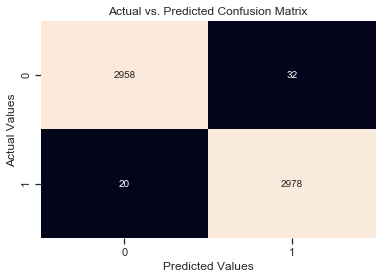

In [239]:
cmrf=confusion_matrix(ytest,rf1.predict(xtest))
sns.heatmap(cmrf, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

We can observe that it has very less type 1 and type 2 error.

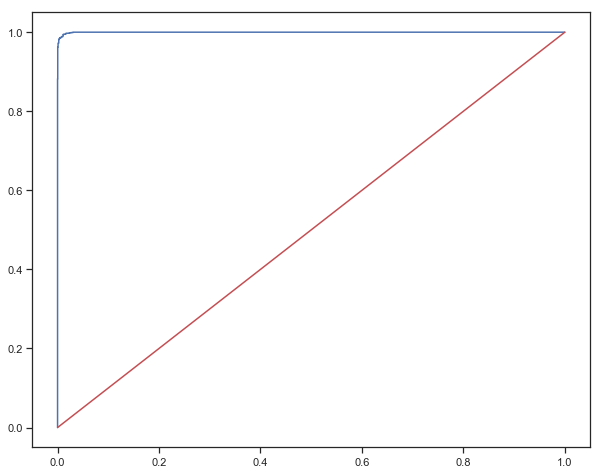

In [240]:
rff, rft, threhrf = roc_curve(ytest,rf1.predict_proba(xtest)[:,1])
plt.figure(figsize=(10,8))
plt.plot(rff, rft, label='random forest')
plt.plot(rff,rff,color='r')

In [241]:
Model.append('Random Forest')
ROC_AUC_Accuracy.append(roc_auc_score(ytest,rf1.predict_proba(xtest)[:,1]))
Precision.append(round(precision_score(ytest,rf1.predict(xtest)), 4))
Recall.append(round(recall_score(ytest,rf1.predict(xtest),average='macro'), 40))
F1_score.append(round(f1_score(ytest,rf1.predict(xtest), average='macro'), 4))
Model, ROC_AUC_Accuracy,Precision,Recall,F1_score

(['Logistic Regression', 'Decision Tree with gini criterion', 'Random Forest'],
 [0.5468668075260876, 0.5432910122913605, 0.9997257926689141],
 [0.5317, 0.5779, 0.9894],
 [0.5251755350835897, 0.5278156452127505, 0.9913132723934128],
 [0.5209, 0.4737, 0.9913])

# Light gbm(lgbm)

In [242]:
from lightgbm import LGBMModel,LGBMClassifier
lgbm = LGBMClassifier(objective='binary',n_estimators=10,reg_alpha=2,reg_lambda=5,random_state=1,learning_rate=0.01,is_unbalance=True)

In [243]:
lgbm.fit(xtrain,ytrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', is_unbalance=True, learning_rate=0.01,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=10, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=1, reg_alpha=2, reg_lambda=5,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [244]:
ypp=lgbm.predict(xtest)

In [245]:
roc_auc_score(ytest,lgbm.predict_proba(xtest)[:,1])

0.6342874625447065

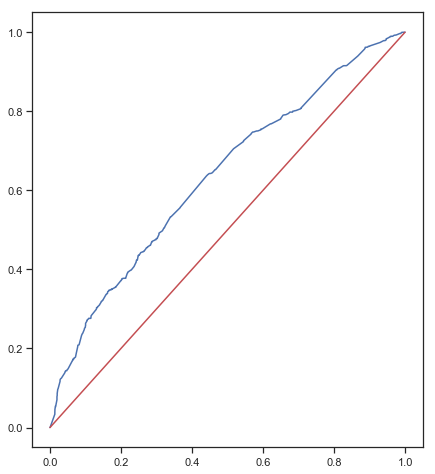

In [257]:
rxg, rtxg, threxg = roc_curve(ytest,lgbm.predict_proba(xtest)[:,1])
plt.figure(figsize=(7,8))
plt.plot(rxg,rtxg, label='lgbm')
plt.plot(rxg,rxg,color='r')

In [246]:
Model.append('Lgbm')
ROC_AUC_Accuracy.append(roc_auc_score(ytest,lgbm.predict_proba(xtest)[:,1]))
Precision.append(round(precision_score(ytest,ypp), 4))
Recall.append(round(recall_score(ytest, ypp,average='macro'), 40))
F1_score.append(round(f1_score(ytest,ypp, average='macro'), 4))
Model,ROC_AUC_Accuracy,Precision,Recall,F1_score

(['Logistic Regression',
  'Decision Tree with gini criterion',
  'Random Forest',
  'Lgbm'],
 [0.5468668075260876,
  0.5432910122913605,
  0.9997257926689141,
  0.6342874625447065],
 [0.5317, 0.5779, 0.9894, 0.728],
 [0.5251755350835897,
  0.5278156452127505,
  0.9913132723934128,
  0.5536167924658802],
 [0.5209, 0.4737, 0.9913, 0.477])

# Final result of all the models

In [247]:
final_result = pd.DataFrame({'Model':Model,'ROC_AUC_Accuracy':ROC_AUC_Accuracy,'Precision':Precision,'Recall':Recall,'F1_score':F1_score})
final_result

Model  ROC_AUC_Accuracy  Precision    Recall  \
0                Logistic Regression          0.546867     0.5317  0.525176   
1  Decision Tree with gini criterion          0.543291     0.5779  0.527816   
2                      Random Forest          0.999726     0.9894  0.991313   
3                               Lgbm          0.634287     0.7280  0.553617   

   F1_score  
0    0.5209  
1    0.4737  
2    0.9913  
3    0.4770

As from the above result we can infer that Random forest gives the best result as it bins the data.And is good for large datasets.
So we will check what are the important features for our models.

# Important features from our model

<Figure size 432x432 with 0 Axes>

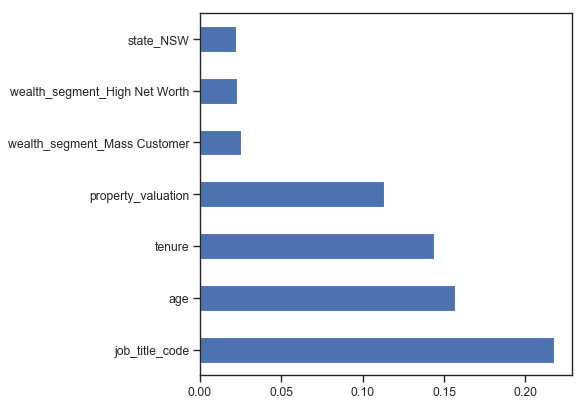

In [250]:
plt.figure(figsize=(6,6))
from matplotlib.pyplot import figure
figure(num=None, figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(rf1.feature_importances_, index= X.columns)
feat_importances.nlargest(7).plot(kind='barh')

# ROC curve for all the models

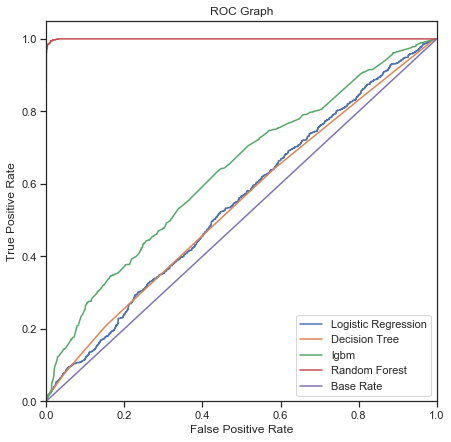

In [258]:
plt.figure(figsize=(7,7))
from sklearn.metrics import roc_curve
plt.plot(fpr_lv,tpr_lv, label='Logistic Regression')
plt.plot(dtf,dtt,label='Decision Tree')
plt.plot(rxg,rtxg, label='lgbm')
plt.plot(rff, rft, label='Random Forest')
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Wealth segment with age using Anova

**Ho:mean of different wealth segments age is same**

**Ha: mean of different wealth segments age is significantly different**

In [251]:
df.wealth_segment.value_counts()

Mass Customer        10029
High Net Worth        5081
Affluent Customer     4849
Name: wealth_segment, dtype: int64

In [252]:
g=df.groupby('wealth_segment')
g1=g.get_group('Mass Customer').age
g2=g.get_group('High Net Worth').age
g3=g.get_group('Affluent Customer').age

In [254]:
stats.f_oneway(g1,g2,g3)

F_onewayResult(statistic=1.3913895278851078, pvalue=0.2487535764790205)

As the pvalue is more than 0.05 so for 95% confidence interval we can infer that the age distribution is same in all the three wealth segment.

That is all the different age group people are present in all the thre wealth group segment.